In [140]:
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error
from math import sqrt

%matplotlib inline

In [141]:
def print_image(plot,data,number, shape=(64, 64)):
    vmax = np.maximum(data.max(), -data.min())
    plt.imshow((data.reshape((shape)).T), cmap=plt.cm.gray,
              vmin=-vmax,vmax=vmax, interpolation='nearest')
    ax = plt.gca()
    ax.set_yticks([])
    ax.set_xticks([])

## Part 1. Implement PCA and Dual PCA algorithms

### <span style="color:red">=========== Assignment 1 ===========</span>

In [142]:
# PCA (with covariance)

def my_pca(X):
    num_components=3
    X_meaned=X-np.mean(X,axis=0)
    cov_mat=np.cov(X_meaned,rowvar=False)
    eigen_values , eigen_vectors = np.linalg.eig(cov_mat)
    sorted_index = np.argsort(eigen_values)[::-1]
    sorted_eigenvalue = eigen_values[sorted_index]
    sorted_eigenvectors = eigen_vectors[:,sorted_index]
    eigenvector_subset = sorted_eigenvectors[:,0:num_components]
    X_reduced = np.dot(eigenvector_subset.transpose() , X_meaned.transpose() ).transpose().real
    return X_reduced

### <span style="color:red">=========== End of Assignment 1 ===========</span>

### <span style="color:red">=========== Assignment 2 ===========</span>

In [143]:
# PCA (with SVD)

def my_dual_pca(X):
    U,S,V=np.linalg.svd(X)
    return U,S,V

### <span style="color:red">=========== End of Assignment 2 ===========</span>

## Part 2. Visualisation

### <span style="color:red">=========== Assignment 3 ===========</span>

In [144]:
# Import dataset
import numpy as np
from sklearn import datasets
from matplotlib import pyplot as plt

%matplotlib inline
iris = datasets.load_iris()
X = iris.data
y = iris.target

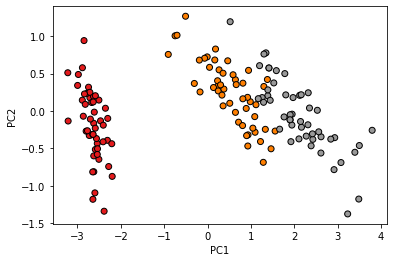

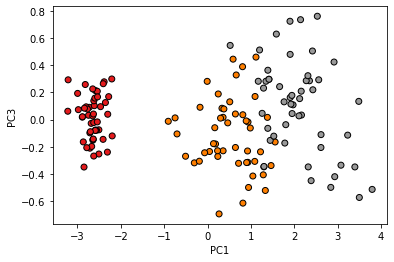

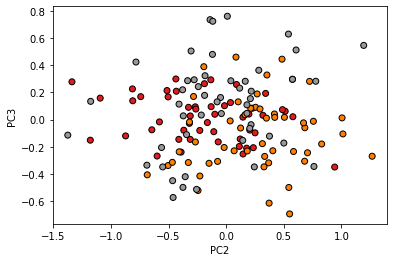

In [145]:
# Visualisation
mat_reduced=my_pca(X)
plt.scatter(mat_reduced[:, 0], mat_reduced[:, 1], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()
plt.scatter(mat_reduced[:, 0], mat_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.show()
plt.scatter(mat_reduced[:, 1], mat_reduced[:, 2], c=y, cmap=plt.cm.Set1, edgecolor='k')
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.show()

'''
In the first graph(PC1-PC2), we can see that the classes are well separated from each other. This degree of separation seems to 
be decreasing as we move towards the second(PC1-PC3) and the third(PC2-PC3) graph. This means that PC1 and PC2 are our top 
components which together can separate the classes of iris data. 
'''

### <span style="color:red">=========== End of Assignment 3 ===========</span>

## Part 3. Image compression

### <span style="color:red">=========== Assignment 4 ===========</span>

Text(0.5, 1.0, 'Cumulative % of Information About the Data \nCarried by Singular Vectors')

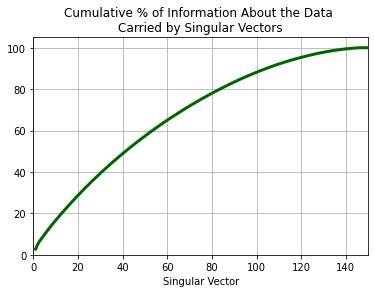

In [146]:
X, _ = np.load('Yale_64x64.npy', allow_pickle=True)

_, num_examples = X.shape
test_sample = 0

test_indices =  np.arange(test_sample, num_examples, 11)
train_indices = np.delete(np.arange(num_examples), test_indices) 

train_X = X[:, train_indices]
test_X = X[:, test_indices]
raw_faces=np.linalg.pinv(train_X)
per_pixel_centred = raw_faces - raw_faces.mean(axis=0)
faces = per_pixel_centred - per_pixel_centred.mean(axis=1).reshape((150, 1))
u,s,v=my_dual_pca(faces) 
total_S = s.sum()
'''
As you can see in the graph, after vector number 122 till vector number 147, the vectors retain about 85-99% of the information.
So my k is going to be 35.
'''
n_components = len(s)
component_idx = range(1,  n_components + 1)
info_retained = 100 * np.cumsum(s) / total_S
plt.plot(component_idx, info_retained, color='darkgreen', linewidth=3)
plt.xlim(0, n_components)
plt.ylim([0, 105])
plt.xlabel("Singular Vector")
plt.grid()
plt.title("Cumulative % of Information About the Data \nCarried by Singular Vectors")



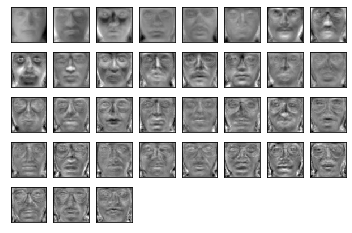

In [147]:
# Image compression
def plot_faces(faces, number):
    for i in range(0,number):
        ax = plt.subplot(5, 8, i+1)
        print_image(plt,faces[number-i-1,:],i)

u,s,v=my_dual_pca(faces)          
num_components=147
top_components=v[112:num_components,:]
k=147-112
plot_faces(top_components,k)

### <span style="color:red">=========== End of Assignment 4 ===========</span>

### <span style="color:red">=========== Assignment 5 ===========</span>

Low-level represtantion of 1 image 

['-0.0000389', '0.0000037', '-0.0000053', '-0.0000089', '0.0000584', '-0.0000139', '0.0000545', '0.0000139', '0.0000470', '-0.0000753', '0.0000277', '-0.0000291', '-0.0000324', '0.0000304', '-0.0000339', '0.0000479', '0.0000586', '-0.0000354', '0.0000393', '0.0000596', '0.0000126', '-0.0000078', '-0.0000988', '0.0000994', '-0.0000755', '0.0000399', '-0.0000325', '-0.0000974', '0.0001589', '-0.0000522', '-0.0000627', '0.0001038', '0.0000856', '-0.0000106', '0.0001084']


Low-level represtantion of 2 image 

['-0.0000389', '0.0000037', '-0.0000053', '-0.0000089', '0.0000584', '-0.0000139', '0.0000545', '0.0000139', '0.0000470', '-0.0000753', '0.0000277', '-0.0000291', '-0.0000324', '0.0000304', '-0.0000339', '0.0000479', '0.0000586', '-0.0000354', '0.0000393', '0.0000596', '0.0000126', '-0.0000078', '-0.0000988', '0.0000994', '-0.0000755', '0.0000399', '-0.0000325', '-0.0000974', '0.0001589', '-0.0000522', '-0.0000627', '0.0001038', '0.0000856', '-0.0

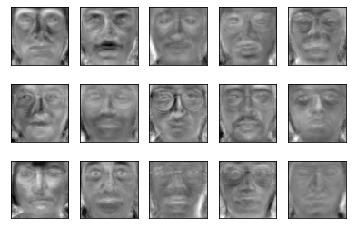

In [148]:
test_faces=np.linalg.pinv(test_X)

def low_level_representation(Y,C):
   weights=np.dot(Y, C.T)
   l=[]
   for i in range(weights.shape[0]):
      for j in range(weights.shape[1]):
          l.append(f"{weights[i][j]:.7f}")
      print("Low-level represtantion of "+str(i+1)+" image \n")
      print(l)
      print('\n')
low_level_representation(test_faces, top_components)


def reconstruction(Y, C, M, h, image_index):
    n_samples, n_features = Y.shape
    weights = np.dot(Y, C.T)
    centered_vector=np.dot(weights[image_index, :], C)
    recovered_image=(M+centered_vector)
    return recovered_image
recovered_faces=[reconstruction(test_faces, top_components, raw_faces.mean(axis=0), test_faces.shape[0], i) for i in range(len(test_faces))]

def plot_test_faces(faces, number):
    for i in range(0,number):
        ax = plt.subplot(number//5, 5, i+1)
        print_image(plt,faces[i],i)
plot_test_faces(recovered_faces, len(test_faces))

'''
For reporting the reconstruction error for each image, I have calculated the mean squared error between each real image and its
corresponding reconstructed image and then I normalised it about the mean value.
'''
for i in range(len(test_faces)):
    a=test_faces[i]
    b=recovered_faces[i]
    rmse = sqrt(mean_squared_error(a, b))
    nrmse = rmse/sqrt(np.mean(a**2))
    print("Reconstruction error for "+str(i+1)+" image is "+str(nrmse))

### <span style="color:red">=========== End of Assignment 5 ===========</span>

## Part 4. Application: face recognition

### <span style="color:red">=========== Assignment 6 ===========</span>

In [149]:
train_X, train_y, test_X, test_y = np.load('Yale_64x64-part-4-persons.npy', allow_pickle=True)

In [150]:
# Comparison
train_X=np.linalg.pinv(train_X)
test_X=np.linalg.pinv(test_X)

train_X_reduced=my_pca(train_X)
test_X_reduced=my_pca(test_X)

#Now that the training and testing data has been transformed by my PCA function, it is ready to be trained by the svm classifer.
clf = SVC()

#Training phase
clf.fit(train_X_reduced, train_y)

#Testing phase
y_pred = clf.predict(test_X_reduced)

print("With PCA ")
print("accuracy score:{:.2f}".format(accuracy_score(test_y, y_pred)))
print(confusion_matrix(test_y, y_pred))

#This is for without using the PCA function.
clf = SVC()

#Training Phase
clf.fit(train_X, train_y)

#Testing Phase
y_pred = clf.predict(test_X)

print("\nWithout PCA ")
print("accuracy score:{:.2f}".format(accuracy_score(test_y, y_pred)))
print(confusion_matrix(test_y, y_pred))

With PCA 
accuracy score:0.67
[[1 2]
 [0 3]]

Without PCA 
accuracy score:0.67
[[3 0]
 [2 1]]


### <span style="color:red">=========== End of Assignment 6 ===========</span>